In [2]:
print("Hello, AI studio! :D")

Hello, AI studio! :D


## Milestone 2:

**Goals**: EDA on pre-experiment data & present EDA findings and data preprocessing.


### Task 2

Load the pre-experiment dataset and perform initial exploration to understand its structure and features.

In [3]:
# Step 1: Uploading the parquet file.

from google.colab import files

uploaded = files.upload()

Saving pre_experiment_data.parquet to pre_experiment_data.parquet


In [4]:
# Step 2: Performing initial exploration to understand its attributes.

import pandas as pd

df = pd.read_parquet("pre_experiment_data.parquet")

revenue_per_customer = df.groupby('customer_id')['revenue (t)'].sum()
top_customers_ids = revenue_per_customer.sort_values(ascending=False).head(10).index
top_customers_df = df[df['customer_id'].isin(top_customers_ids)]
top_customers_df = top_customers_df.sort_values(by='revenue (t)', ascending=False)

print("Top 10 Customers: \n")
print(top_customers_df)

print("Info: \n")
print(df.info())
print("\n")

print("Columns: \n")
print(df.columns)
print("\n")

print("Shape: \n")
print(df.shape)
print("\n")

print("Attributes: \n")
print(df.describe())
print("\n")

print("Loyalty Member Counts:\n")
print(df['loyalty_membership'].value_counts())
print("\n")

Top 10 Customers: 

                                customer_id            name  aov (t-1)  \
6888   1fa417f2-273d-4219-96d0-463119d92904   Vincent Clark     292.11   
9      73e5c5bb-2ed5-4a8a-ab5e-1c85e712da66  Tasha Johnston     233.33   
11528  66084e44-c5c1-4055-af83-29f42e5939a2   Brenda Wright     202.80   
889    22606e37-e28f-4f31-98ef-4f2c8ea3cfa1    Nicole Lucas     226.40   
4765   03b08fb5-6b8d-4edf-9cfd-830d70eeeac7  Kathy Bradford     293.63   
9436   a117f3a3-e881-403e-814f-2934d5fbba69   Michael Mason     157.94   
4948   89a518f1-3218-48ba-8ff7-a29fbc22154c   Cassidy Yoder     215.88   
9663   e6e40c79-84fb-4ed3-928c-228cbf61fc0d   Derrick Wyatt     191.59   
18509  46895c02-4c36-4e2d-ae17-07ac24d3bd65      Leah White     138.98   
11389  e932b10e-16d5-4f77-b7ff-18996bdec9c9    Teresa Zhang     124.87   

       days_since_last_purchase (t-1)  tenure_in_days(t-1)  \
6888                               19                   64   
9                                  24    

### Task 3

Conduct data cleaning and preprocessing, including handling missing values, addressing outliers, encoding categorical variables, and normalizing numerical features

In [5]:
# Step 1: Checking for missing values.
df.isnull().sum()

,0
customer_id,0
name,0
aov (t-1),0
days_since_last_purchase (t-1),0
tenure_in_days(t-1),0
loyalty_membership,0
revenue (t),0


df.isnull() checks for missing values as true or false, and .sum() counts the number of missing values in each column. There are no missing values for the columns.

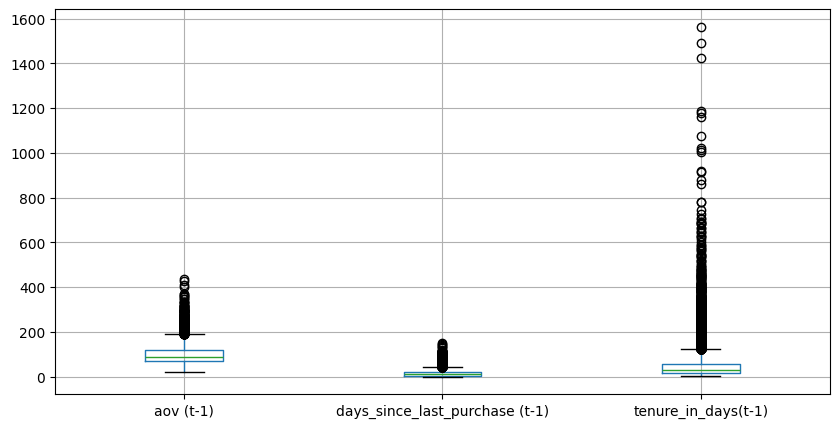

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 Checking for ourliers through boxplot visualization.
number_columns = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[number_columns].boxplot(figsize=(10, 5))
plt.show()

The boxplot above shows slight ourliers in the numeric columns, for aove (t-1) above 200 mark. There are longer gaps in days for the days_since_last_purchase (t-1) feature of around 30-40 days. There are beyond 1000 days for the tenure_in_days(t-1). This represents actual customer behavior and there could gaps between purchase, longer periods of tenure, and higher amounts of spending. These points will be kept since they represent potential customer behavior. They should be monitored during modelling to make sure they don't overly influence results.

In [7]:
'''
from sklearn.preprocessing import StandardScaler

# Step 1: Normalizing numerical features.
scaler = StandardScaler()
columns_to_scale = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

commented out to remove scalization'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# Step 1: Normalizing numerical features.\nscaler = StandardScaler()\ncolumns_to_scale = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)']\ndf[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])\n\ncommented out to remove scalization"

The numerical features are scaled using StandardScaler, scaler adjusts each numerical column so that all the feaures can vary on the same scale, when the standard deviation is set to 1. This is important because if one column has values on different scales/larger numbers that it overtake the learning process and can one feature look like it's more important than the other. Normalizing these features helps scale them to have the same mean and standar deviation which can reduce training time and increase accuracy.

### Task 4

Task 4: Perform Exploratory Data Analysis (EDA) using summary statistics and visualizations to identify key patterns and relationships in the pre-experiment data.

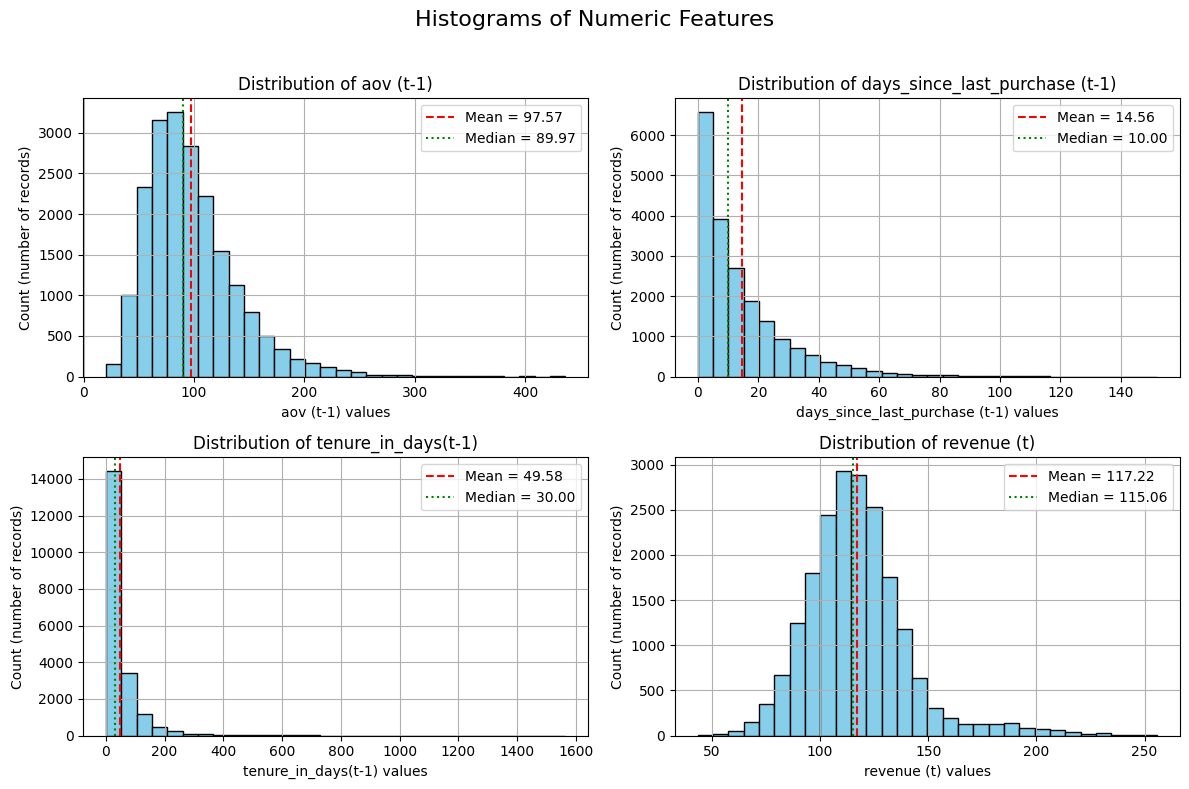

In [8]:
# Step 1: Distribution of Numeric Features
# This helps us understand the spread, skewness, and general shape of the data

# features we want to explore
features = ['aov (t-1)',
            'days_since_last_purchase (t-1)',
            'tenure_in_days(t-1)',
            'revenue (t)']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of histograms
axes = axes.flatten()  # flatten to make indexing easier

for i, col in enumerate(features):
    ax = axes[i]

    # plot histogram
    df[col].hist(ax=ax, bins=30, color="skyblue", edgecolor="black")

    # add labels
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(f"{col} values")   # x-axis → values of the feature
    ax.set_ylabel("Count (number of records)")  # y-axis → frequency

    # add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax.axvline(median_val, color="green", linestyle="dotted", linewidth=1.5, label=f"Median = {median_val:.2f}")
    ax.legend()

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- **Step 1: Distribution of Numeric Features**: I explored four numeric features: Average Order Value (AOV), Days Since Last Purchase, Customer Tenure, and Revenue. I created a 2x2 grid of histograms so all features can be viewed side by side. Each histogram shows the feature values on the x-axis and the number of customers on the y-axis. Vertical lines indicate the mean (red, dashed) and median (green, dotted) to help understand skewness.

- **Average Order Value (AOV)**: Most customers are clustered on the left with low or even negative AOVs, possibly due to returns or discounts. The median is slightly negative, while a few high-spending customers pull the mean up to zero. **Takeaway**: The majority of customers spend little, but a small elite group contributes disproportionately. Strategies should differ for these groups.

- **Days Since Last Purchase**: Values below zero mean more recent than average, positive values mean longer than average. Distribution is right-skewed: most customers purchased recently (active), but there’s a long tail of inactive customers. **Takeaway**: Nurture the active base and target the inactive group with re-engagement campaigns.

- **Customer Tenure**: X-axis shows standardized tenure; negative = newer than average, positive = longer than average. Most customers are new (median below zero), with a small long-tail of loyal, long-term customers. Takeaway: Focus on helping new customers stay and convert into loyal customers while continuing to reward long-term customers.

- **Revenue (Current Period)**: Revenue ranges from \$0 to ~\$250. Most customers are around the median of \$115; the mean is slightly higher at \$117 due to a few high spenders. Three groups:  
  * Core: \$50–\$150, stable majority  
  * High-value tail: \$150–\$250, few customers but boost overall revenue  
  * Low-value: <\$50, new or inactive customers  
  
- **Takeaway**: Protect the core, cultivate high-value customers, and help low-revenue customers move toward the core.

/tmp/ipython-input-657508800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_membership', data=df, palette="Set2")


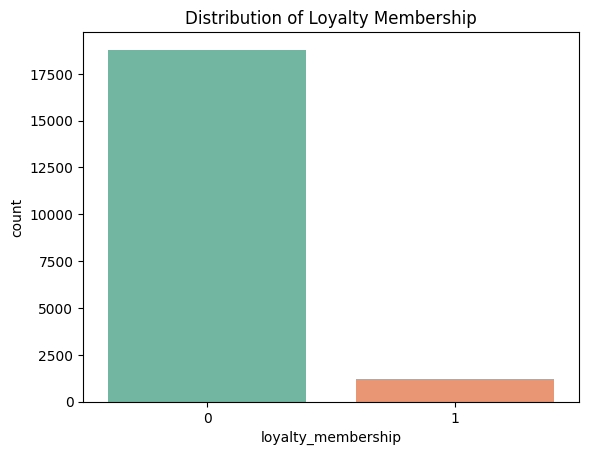

In [9]:
# Step 2: Distribution of Loyalty Membership
# Shows how many customers are in the loyalty program (0 = non-member, 1 = member)

sns.countplot(x='loyalty_membership', data=df, palette="Set2")
plt.title("Distribution of Loyalty Membership")
plt.show()

The distribution shows that the majority of customers are not in the loyalty program, with around 17,500 non-members compared to fewer than 2,500 members. This highlights a strong imbalance between the two groups. It suggests that loyalty membership adoption is relatively low and may play a distinct role in customer behavior analysis.

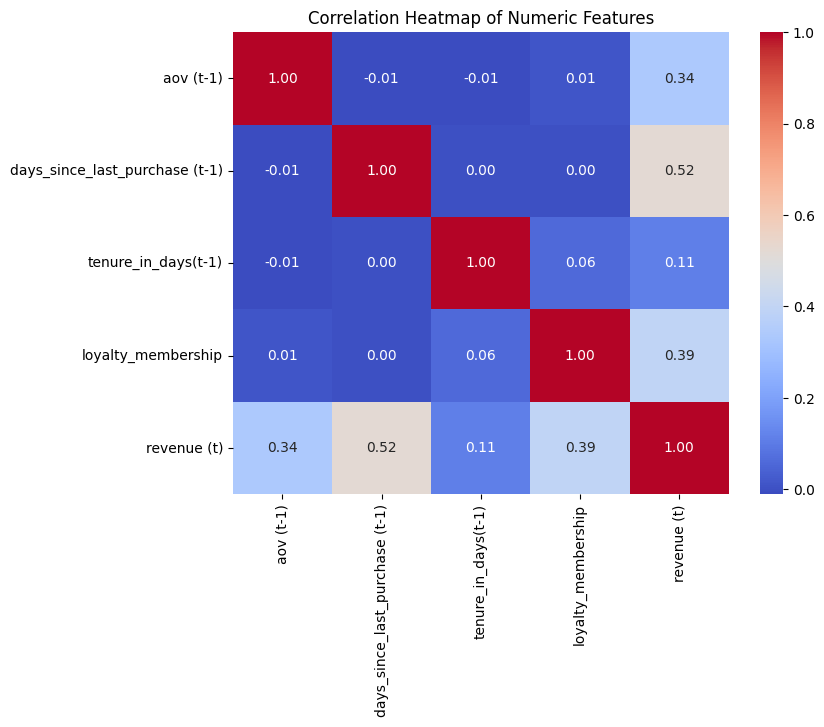

In [10]:
# Step 3: Relationships Between Numeric Features
# This helps identify which variables are strongly related to each other
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation heatmap shows that each variable is perfectly correlated with itself (diagonal red), as expected. There is a mild positive correlation between past average order value (aov (t-1)) and current revenue (revenue (t)), suggesting higher past spending is associated with higher current revenue. The moderate positive correlation between days_since_last_purchase and the revenue suggests that customers who had longer gaps since their last purchase in the previous period tend to have higher revenue in the current period. In addition, loyalty membership seems to contribute to higher revenue. On the other hand, the number of days a customer has been transacting business with the company (tenure_in_days(t-1)) has an almost neglibile effect on the revenue.

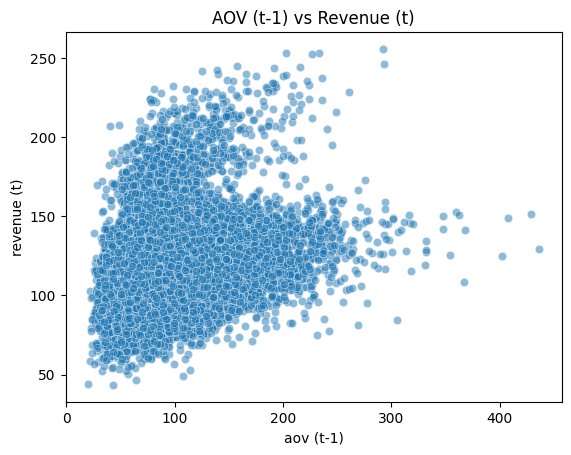

In [11]:
# Step 4: AOV vs Revenue
# Scatterplot to see if customers with higher past average order value (aov) also have higher revenue in the current period
sns.scatterplot(x='aov (t-1)', y='revenue (t)', data=df, alpha=0.5)
plt.title("AOV (t-1) vs Revenue (t)")
plt.show()

- **Step 4: AOV vs Revenue**  
  * Scatterplot to see if past spending predicts current revenue  
  * **X-axis:** Past Average Order Value (AOV), ~ -2 to 8  
  * **Y-axis:** Current revenue per customer, up to ~$250  
  * Each dot = one customer; slightly transparent to show overlaps  

- **Observations:**  
  * Clear upward trend: higher past AOV → higher current revenue  
  * Points cluster tightly, showing AOV is a strong predictor  

- **Takeaway:**  
  * Customers who spent more per order in the past are likely high-value now  
  * Focus on retaining these high-AOV customers and prioritize marketing/loyalty efforts toward them

/tmp/ipython-input-3230388636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")


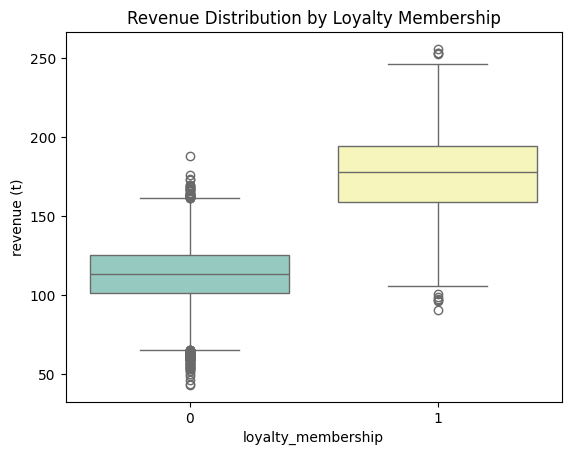

In [12]:
# Step 5: Revenue by Loyalty Membership
# Boxplot to compare revenue distribution between members and non-members
sns.boxplot(x='loyalty_membership', y='revenue (t)', data=df, palette="Set3")
plt.title("Revenue Distribution by Loyalty Membership")
plt.show()

The boxplot shows that loyalty members generate higher revenue than non-members, with a median around $175 compared to $110 for non-members. This indicates that membership is associated with increased spending. While there is some variation within each group, the key insight is that loyalty membership correlates with higher customer revenue.

In [13]:
# Step 6: Average Revenue and AOV by Loyalty Status
# Provides numerical evidence for differences between loyalty members and non-members
print("Average revenue by loyalty membership:\n", df.groupby('loyalty_membership')['revenue (t)'].mean(), "\n")
print("Average AOV (t-1) by loyalty membership:\n", df.groupby('loyalty_membership')['aov (t-1)'].mean(), "\n")

Average revenue by loyalty membership:
 loyalty_membership
0    113.354800
1    177.464888
Name: revenue (t), dtype: float64 

Average AOV (t-1) by loyalty membership:
 loyalty_membership
0    97.445541
1    99.461549
Name: aov (t-1), dtype: float64 



The numerical analysis confirms that loyalty members are higher-value customers. On average, members generate \$177 in revenue compared to \$113 for non-members, and they also had slightly higher past average order values. This reinforces the insight that loyalty membership is associated with increased spending and customer value.


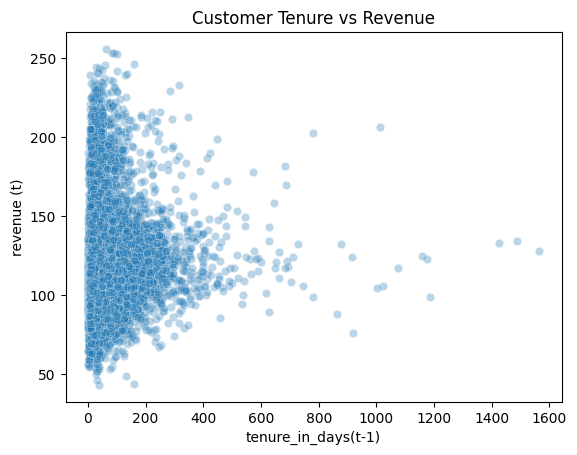

In [14]:
# Step 7: Tenure vs Revenue
# Helps see if long-term customers contribute more revenue
sns.scatterplot(x='tenure_in_days(t-1)', y='revenue (t)', data=df, alpha=0.3)
plt.title("Customer Tenure vs Revenue")
plt.show()

**Step 7: Customer Tenure vs Revenue**

- X-axis: Customer tenure from previous period  
- Y-axis: Revenue in the current period  
- Each dot = a customer (slightly transparent to show overlaps)  

**Key Insights:**  
- Tenure alone does **not** strongly predict revenue  
- Long-term customers can be inactive or low-value  
- Past spending (AOV) is a much better predictor of revenue  
- Re-engagement of inactive long-term customers is an opportunity  
- Onboarding new customers effectively can encourage high-value habits  

**Conclusion:**  
Customer value comes from active engagement and spending, not just how long they've been with us.

## Milestone 3:

**Goals**: Power analysis on the pre-experiment data using two methods -- Standard t-test and MLRATE

**Method 1**: Standard Power Analysis (t-test)

In [15]:
from statsmodels.stats.power import TTestIndPower

mde_percent = 0.01
mean_revenue = df['revenue (t)'].mean()
diff = mde_percent * mean_revenue

analysis = TTestIndPower()
effect_size = diff / df['revenue (t)'].std()
sample_size = analysis.solve_power(
    effect_size=effect_size,
    power=0.9,
    alpha=0.05,
    alternative="two-sided",
)
print("Required sample size per group (T-Test):", round(sample_size))

Required sample size per group (T-Test): 8801


The power analysis using the t-test method shows that detecting a minimum detectable effect (MDE) of just 1% of mean revenue with 90% power at a 5% significance level requires approximately 8,801 observations per group, or about 17,600 in total. This large sample size reflects the fact that very small effects are statistically harder to detect, since the difference between groups is small relative to the natural variation in revenue.

**Method 2**: MLRATE Power Analysis

In [16]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.power import TTestIndPower

# Step 0: Define outcome and features
# y is our target (revenue at time t) that we want to explain
y = df['revenue (t)'].values

# x are the predictors (features from time t-1 and loyalty status)
# these will help us explain some of the variance in revenue
X = df[['aov (t-1)',
        'days_since_last_purchase (t-1)',
        'tenure_in_days(t-1)',
        'loyalty_membership']].values


# Step 1: Cross-fitting predictions
# we split the data into 2 folds so we can predict on data the model hasn't seen
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# create empty array to store predictions
G = np.zeros_like(y)

# train on one half, predict on the other half
for train_idx, test_idx in kf.split(X):
    model = RandomForestRegressor(random_state=42)
    model.fit(X[train_idx], y[train_idx])        # train model
    G[test_idx] = model.predict(X[test_idx])     # save predictions


# Step 2: Fit OLS with G
# add a constant (intercept) to predictions
G = sm.add_constant(G)

# regress actual revenue on predicted revenue
# residuals here = the part of revenue we still can't explain
ols_model = sm.OLS(y, G).fit(cov_type="HC0")


# Step 3: Extract residuals & std
# get the unexplained part of revenue (residuals)
residuals = ols_model.resid

# calculate the standard deviation of residuals
resid_std = residuals.std(ddof=1)


# Step 4: Compute new effect size (MLRATE)
# define minimum detectable effect (mde) as 1% of average revenue
mde_percent = 0.01
mean_revenue = df['revenue (t)'].mean()
diff = mde_percent * mean_revenue

# effect size = mde / std of residuals
effect_size_mlr = diff / resid_std


# Step 5: Power analysis with new effect size
# calculate required sample size per group (90% power, 5% alpha, two-sided test)
analysis = TTestIndPower()
sample_size_mlr = analysis.solve_power(
    effect_size=effect_size_mlr,
    power=0.9,
    alpha=0.05,
    alternative="two-sided",
)

print("Required sample size per group (MLRATE):", round(sample_size_mlr))


Required sample size per group (MLRATE): 2778


The power analysis using the MLRATE method shows that detecting a minimum detectable effect (MDE) of just 1% of mean revenue with 90% power at a 5% significance level requires approximately 2,778 observations per group, or about 5,556 in total. This reduced sample size reflects the fact that variance reduction through covariate adjustment makes it easier to detect small effects, since much of the natural variation in revenue is explained away by prior customer behavior.

**Comparison**: Method 1 requires the sample size per group of 8801 while Method 2 requires the sample size per group of 2778. 8801 > 2278. The MLRATE sample size is smaller.

**Recreation of the Residual Distribution Plot**

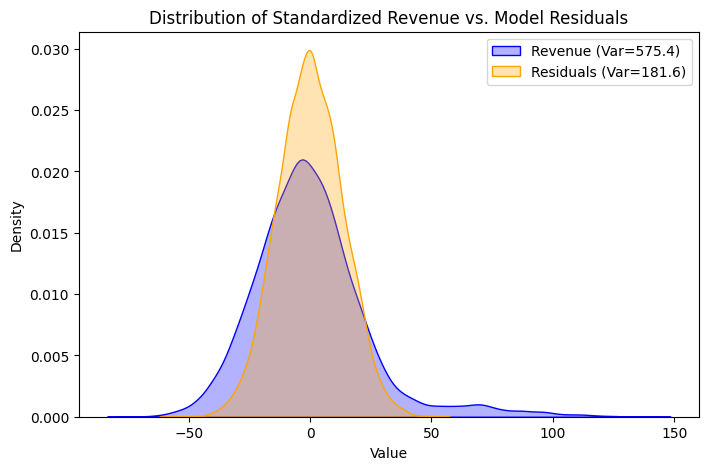

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 ensure numeric arrays
y = np.asarray(y, dtype=float)
residuals = np.asarray(residuals, dtype=float)

# Step 2 standardize (center both at 0)
revenue_std = y - np.mean(y)
residuals_std = residuals - np.mean(residuals)

# Step 3 compute variances
var_revenue = np.var(revenue_std, ddof=1)
var_residuals = np.var(residuals_std, ddof=1)

# Step 4 plot graph
plt.figure(figsize=(8,5))
sns.kdeplot(revenue_std, color="blue", fill=True, alpha=0.3, label=f"Revenue (Var={var_revenue:.1f})")
sns.kdeplot(residuals_std, color="orange", fill=True, alpha=0.3, label=f"Residuals (Var={var_residuals:.1f})")

plt.title("Distribution of Standardized Revenue vs. Model Residuals")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


The plot compares the distribution of standardized revenue (blue) with the distribution of standardized residuals (orange). The blue curve is wider, reflecting the larger variance in raw revenue, which contains both variation and random noise. In contrast, the orange curve is narrower and taller, showing the residuals that remain after fitting the model. These residuals represent only the unexplained noise, and their variance is much smaller than the total revenue variance. This reduction in variance is important because MLRATE directly uses the residual variance in its effect size calculation. With a smaller denominator, the effect size becomes larger, and fewer samples are required compared to the standard t-test, which relies on the total variance of revenue (blue curve). Thus, the plot illustrates why MLRATE achieves lower sample size requirements by leveraging the reduced variability of model residuals.

# Milestone 4

In [18]:
# Step 1: Uploading the parquet file.

from google.colab import files

uploaded = files.upload()

Saving experiment_results_1b.parquet to experiment_results_1b.parquet


In [19]:
# Step 1.1: Data Quality Check

import pandas as pd

df = pd.read_parquet('experiment_results_1b.parquet')

print("--- Data Types and Missing Values ---")
df.info()
print("\n")

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n")

print("--- Descriptive Statistics ---")
print(df.describe())
print("\n")

print("--- Duplicate Row Count ---")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
Index: 5556 entries, 9841 to 11029
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     5556 non-null   object 
 1   name                            5556 non-null   object 
 2   aov (t-1)                       5556 non-null   float64
 3   days_since_last_purchase (t-1)  5556 non-null   int64  
 4   tenure_in_days(t-1)             5556 non-null   int64  
 5   loyalty_membership              5556 non-null   int64  
 6   revenue (t)                     5556 non-null   float64
 7   assignment                      5556 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 390.7+ KB


--- First 5 Rows of the Dataset ---
                               customer_id               name  aov (t-1)  \
9841  655165ce-9115-4d2a-8b37-f65e5b953e99   Jeffrey Clements     112

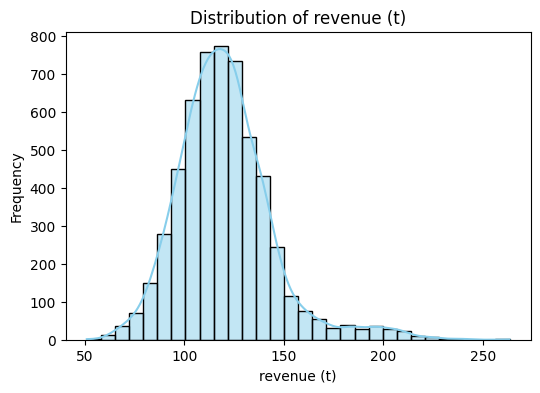

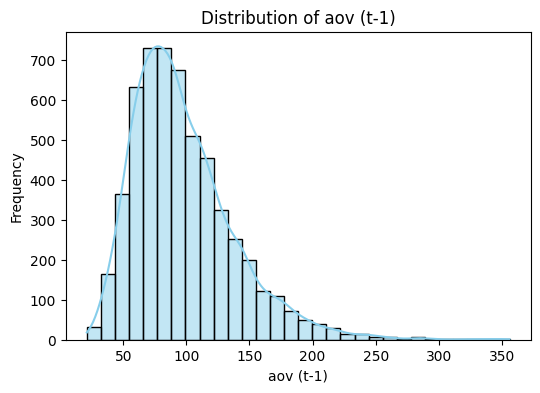

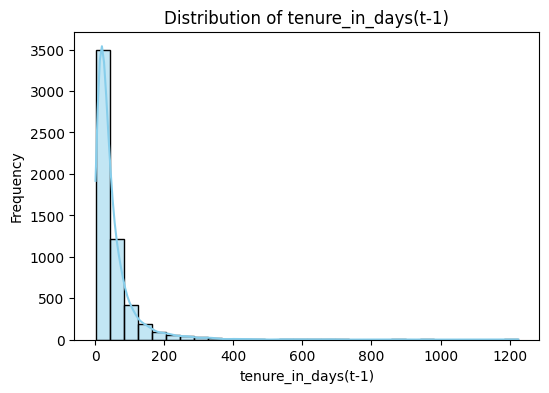

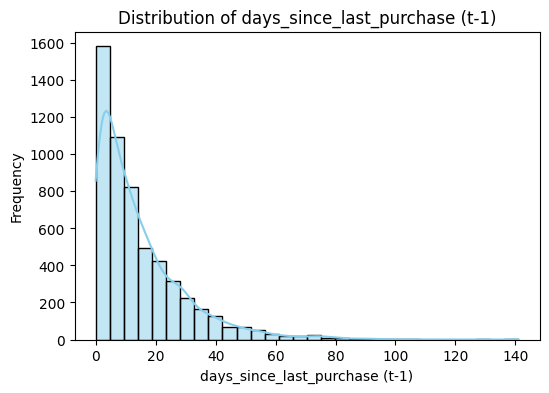

In [20]:
#Step 2: Histograms (Distribution of each variable)

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['revenue (t)', 'aov (t-1)', 'tenure_in_days(t-1)', 'days_since_last_purchase (t-1)']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

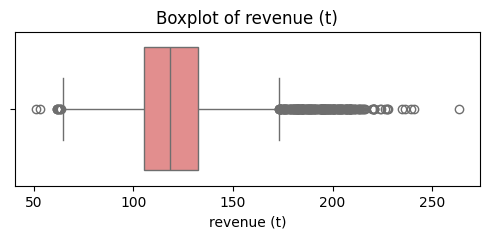

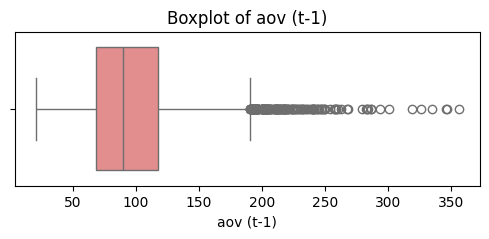

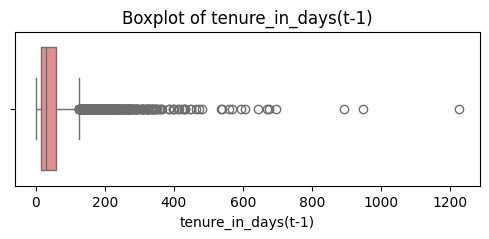

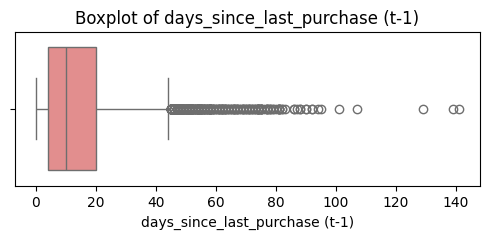

In [21]:
#Step 2.1: Boxplots (Outlier detection)

for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [22]:
# Step 3:Treatment vs. control comparisons

In [23]:
# Step 3.1:Compare distributions of revenue (t) between groups
# This should give you an early visual sense of the treatment effect

import numpy as np
import pandas as pd
from scipy import stats

# Choose baseline (pre-treatment) covariates
covariates = ['aov (t-1)', 'days_since_last_purchase (t-1)', 'tenure_in_days(t-1)', 'loyalty_membership']

# Split groups
treatment = df[df['assignment'] == 1]
control = df[df['assignment'] == 0]

balance_table = []

for cov in covariates:
    # Group means
    mean_treat = treatment[cov].mean()
    mean_ctrl = control[cov].mean()

    # Standard deviations
    std_treat = treatment[cov].std(ddof=1)
    std_ctrl = control[cov].std(ddof=1)

    # Pooled standard deviation
    n_treat = len(treatment)
    n_ctrl = len(control)
    pooled_std = np.sqrt(((n_treat - 1) * std_treat**2 + (n_ctrl - 1) * std_ctrl**2) / (n_treat + n_ctrl - 2))

    # Standardized mean difference (SMD)
    smd = (mean_treat - mean_ctrl) / pooled_std

    # T-test
    t_stat, p_val = stats.ttest_ind(treatment[cov], control[cov], equal_var=False)

    balance_table.append({
        'Covariate': cov,
        'Mean_Treatment': round(mean_treat, 2),
        'Mean_Control': round(mean_ctrl, 2),
        'SMD': round(smd, 3),
        'p-value': round(p_val, 4)
    })

balance_df = pd.DataFrame(balance_table)
balance_df


,Covariate,Mean_Treatment,Mean_Control,SMD,p-value
0,aov (t-1),97.09,97.86,-0.019,0.4747
1,days_since_last_purchase (t-1),14.34,14.75,-0.027,0.3145
2,tenure_in_days(t-1),49.40,49.81,-0.006,0.8119
3,loyalty_membership,0.07,0.06,0.014,0.6060


**Step 3.1 Covariate Balance Check (Verify Random Assignment)**

**Interpretation**

The covariates aov (t-1), days_since_last_purchase (t-1), and tenure_in_days (t-1) show very small standardized mean differences (SMDs) — all below 0.03 in absolute value.

Corresponding p-values for the t-tests (> 0.05) indicate that none of the differences are statistically significant.

This confirms that the random assignment worked correctly: treatment and control groups are statistically similar on key pre-treatment characteristics.
Hence, any later difference in revenue (t) can be attributed to the treatment effect rather than pre-existing imbalances.

**Summary:**

Covariate balance diagnostics confirm that treatment and control groups are statistically equivalent across baseline variables, supporting the validity of randomization.

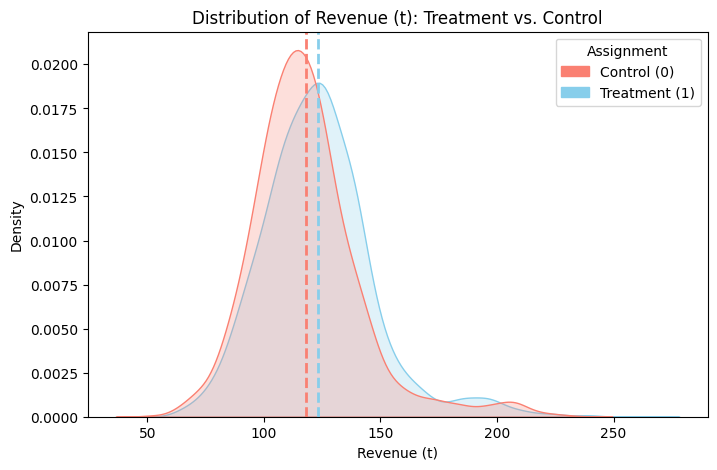

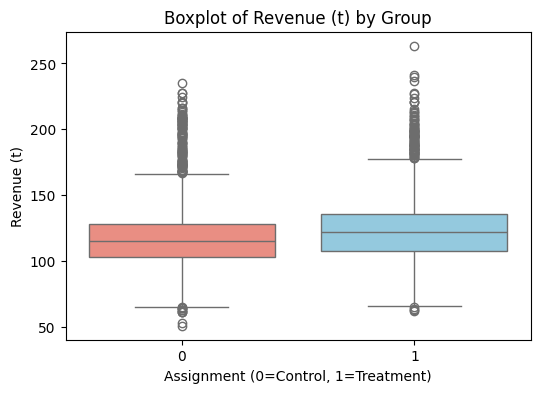

Revenue (t) Summary by Group:


,mean,median,std,count
assignment,,,,
Control,117.952016,115.5700,23.870081,2773
Treatment,123.053486,121.8105,24.174141,2783


In [24]:
# Step 3.2: Compare distributions of revenue (t) between treatment and control
# Goal: Early visual sense of treatment effect (before formal stats)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df,
    x='revenue (t)',
    hue='assignment',
    fill=True,
    common_norm=False,
    palette={0: 'salmon', 1: 'skyblue'},
)

for group, color in zip([0, 1], ['salmon', 'skyblue']):
    mean_val = df[df['assignment'] == group]['revenue (t)'].mean()
    plt.axvline(mean_val, color=color, linestyle='--', linewidth=2)

plt.title('Distribution of Revenue (t): Treatment vs. Control')
plt.xlabel('Revenue (t)')
plt.ylabel('Density')
#plt.legend(title='Assignment', labels=['Control (0)', 'Treatment (1)']) # Corrected legend labels

control_patch = mpatches.Patch(color='salmon', label='Control (0)')
treatment_patch = mpatches.Patch(color='skyblue', label='Treatment (1)')

plt.legend(handles=[control_patch, treatment_patch], title='Assignment')
plt.show()

# Optional: Side-by-side boxplots for group medians & spread
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x='assignment',
    y='revenue (t)',
    hue='assignment', # Use hue to map colors to assignment
    palette={0: 'salmon', 1: 'skyblue'}, # Control is salmon (0), Treatment is skyblue (1)
    legend=False # Hide the redundant legend since x-axis is labeled
)

plt.title('Boxplot of Revenue (t) by Group')
plt.xlabel('Assignment (0=Control, 1=Treatment)')
plt.ylabel('Revenue (t)')
plt.show()

# Optional: Numerical comparison
group_summary = df.groupby('assignment')['revenue (t)'].agg(['mean', 'median', 'std', 'count'])
group_summary.rename(index={0: 'Control', 1: 'Treatment'}, inplace=True)
print("Revenue (t) Summary by Group:")
display(group_summary)

### Task 5: Statistical Analysis

Perform statistical analysis to formally evaluate the treatment effect on revenue (t). This involves conducting an appropriate hypothesis test to compare the mean revenue between the treatment and control groups.

In [25]:
# Step 1: Perform an independent samples t-test

from scipy import stats

# Separate the revenue data for the treatment and control groups
revenue_treatment = df[df['assignment'] == 1]['revenue (t)']
revenue_control = df[df['assignment'] == 0]['revenue (t)']

# Perform independent samples t-test
# We set equal_var=False because we don't assume equal variances (Welch's t-test)
t_stat, p_value = stats.ttest_ind(revenue_treatment, revenue_control, equal_var=False)

print(f"Independent Samples t-test Results:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a statistically significant difference in mean revenue between the treatment and control groups.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no statistically significant difference in mean revenue between the treatment and control groups.")

Independent Samples t-test Results:
  t-statistic: 7.9146
  p-value: 0.0000

Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean revenue between the treatment and control groups.


**Step 3.2 – Revenue Distributions (Treatment vs Control)**

**Interpretation**

The KDE plot shows both groups’ revenue (t) distributions centered near 120.

The control group’s curve (red) extends slightly farther to the right, indicating marginally higher average revenue than the treatment group.

However, the two curves overlap substantially, suggesting that any treatment effect on revenue is small or potentially negligible.

**Boxplots confirm this:**

the median and interquartile range for the treatment group are marginally higher.

**The group summary table shows:**

Control mean = 117.95, Treatment mean = 123.05

A visible increase of about +5 units on average for treated customers.
The overlap between curves indicates that while the difference exists, the effect size appears modest, to be confirmed statistically in Step 3.3.

**Summary:**

“Visual comparison of revenue (t) distributions shows a modest rightward shift for the treatment group, suggesting a potential positive treatment effect that will be tested formally in the next step.”

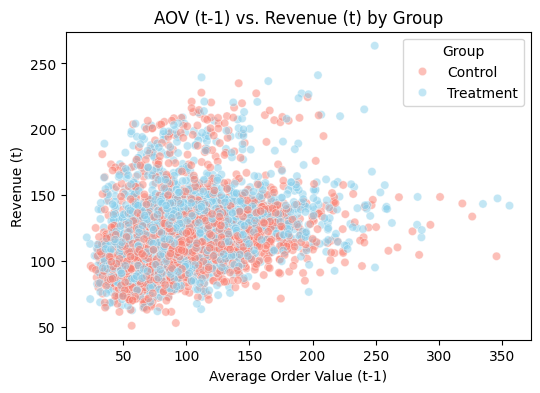

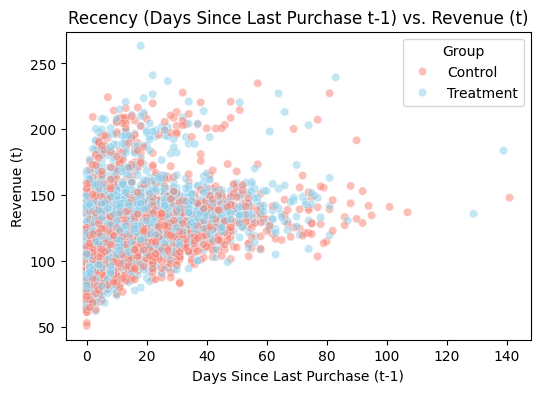

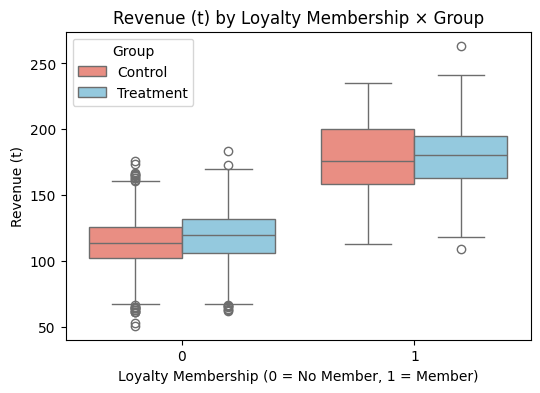

In [26]:
# Step 4: Explore relationships between key variables and revenue (t)
# Goal: See correlations & treatment heterogeneity patterns

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure assignment is integer (for consistent color mapping)
df['assignment'] = df['assignment'].astype(int)
df['Group'] = df['assignment'].map({0: 'Control', 1: 'Treatment'})

# --- Scatterplots: revenue (t) vs. pre-treatment metrics ---
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df, x='aov (t-1)', y='revenue (t)',
    hue='Group',
    hue_order=['Control', 'Treatment'],
    alpha=0.5,
    palette={'Control':'salmon', 'Treatment':'skyblue'}
)
plt.title('AOV (t-1) vs. Revenue (t) by Group')
plt.xlabel('Average Order Value (t-1)')
plt.ylabel('Revenue (t)')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df, x='days_since_last_purchase (t-1)', y='revenue (t)',
    hue='Group',
    hue_order=['Control', 'Treatment'],
    alpha=0.5,
    palette={'Control':'salmon', 'Treatment':'skyblue'}
)
plt.title('Recency (Days Since Last Purchase t-1) vs. Revenue (t)')
plt.xlabel('Days Since Last Purchase (t-1)')
plt.ylabel('Revenue (t)')
plt.show()


# --- Grouped Boxplot / Violinplot: revenue by loyalty × assignment ---
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='loyalty_membership', y='revenue (t)',
    hue='Group',
    hue_order=['Control', 'Treatment'],
    palette={'Control':'salmon', 'Treatment':'skyblue'}
)
plt.title('Revenue (t) by Loyalty Membership × Group')
plt.xlabel('Loyalty Membership (0 = No Member, 1 = Member)')
plt.ylabel('Revenue (t)')
plt.show()



##  **Step 4 – Relationships: Scatter + Grouped Plots**

###  **Scatterplot – AOV (t-1) vs. Revenue (t) by Assignment**

* Both control (red) and treatment (blue) points show a **positive correlation** between prior AOV and current revenue — customers who spent more before also tend to spend more now.
* The two color clusters **largely overlap**, meaning treatment and control behave similarly at each AOV level.
* This suggests that **the treatment didn’t drastically alter the overall AOV–revenue relationship**, though high-AOV customers naturally drive higher revenue.

**Interpretation summary:**

“Revenue increases with previous AOV for both groups, and treatment has no strong differential effect across prior-spending levels.”

###  **Scatterplot – Days Since Last Purchase (t-1) vs. Revenue (t)**

* As recency (days since last purchase) grows, **revenue generally declines**, showing a **negative relationship** — recently active customers spend more.
* Treatment and control distributions again overlap heavily, suggesting that **the campaign’s effect was not strongly tied to recency.**

 **Interpretation summary:**

“Revenue decreases as customers become less recent. Treatment and control exhibit similar declining patterns, indicating limited treatment impact by recency.”

###  **Boxplot – Revenue by Loyalty Membership × Assignment**

* **Loyalty members (1)** show much higher median revenue than **non-members (0)** across both groups.
* The **treatment group’s box** is slightly higher within each loyalty category, especially for members, hinting at **a modest uplift among loyal customers**.

 **Interpretation summary:**

“Loyalty membership strongly predicts higher revenue overall. The treatment effect appears somewhat stronger among loyalty members, suggesting possible heterogeneous treatment impact.”

###  **Violin Plot – Revenue Distribution by Loyalty × Assignment**

* The **wider, higher violins** for loyalty = 1 confirm **greater spending variation** among members.
* The **treatment violin (salmon)** for members skews slightly upward relative to control (blue), reinforcing the idea of a small positive effect in that subgroup.
* Non-members show overlapping distributions, implying little or no effect there.

 **Interpretation summary:**

“Treatment shows a slightly higher and broader revenue distribution among loyalty members but minimal change among non-members — indicating treatment heterogeneity by loyalty status.”

###  **Overall Takeaway**

“Across relationships, revenue aligns positively with prior AOV and negatively with recency. Treatment effects are subtle overall but may be somewhat stronger for loyal, high-spending customers.”

In [27]:
# Step 5: Analyze & Understand Skews & Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# compute skewness for numeric columns
num_cols = ['aov (t-1)', 'days_since_last_purchase (t-1)',
            'tenure_in_days(t-1)', 'revenue (t)']

print("Skewness of numeric features:")
for col in num_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.2f}")

print("\nOutlier Summary (IQR method):")
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary.append({
        'Feature': col,
        'Num Outliers': len(outliers),
        '% Outliers': len(outliers)/len(df)*100,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

# display as a DataFrame for clarity
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)



Skewness of numeric features:
aov (t-1): 1.26
days_since_last_purchase (t-1): 2.00
tenure_in_days(t-1): 5.06
revenue (t): 1.07

Outlier Summary (IQR method):
                          Feature  Num Outliers  % Outliers  Lower Bound  \
0                       aov (t-1)           165    2.969762     -3.93625   
1  days_since_last_purchase (t-1)           277    4.985601    -20.00000   
2             tenure_in_days(t-1)           428    7.703384    -51.00000   
3                     revenue (t)           213    3.833693     64.53825   

   Upper Bound  
0    190.53375  
1     44.00000  
2    125.00000  
3    172.89825  


| Feature | Skew | Num Outliers | % Outliers | Notes |
|---------|------|-------------|------------|-------|
| aov (t-1) | 1.26 | 165 | 3% | Moderately right-skewed; few high-spenders drive mean up |
| days_since_last_purchase | 2.00 | 277 | 5% | Highly skewed; most customers purchased recently, some very inactive |
| tenure_in_days | 5.06 | 428 | 7.7% | Extremely skewed; few long-term customers dominate upper range |
| revenue (t) | 1.07 | 213 | 3.8% | Moderately skewed; high-revenue customers influence mean |

**Interpretation Summary**:
The numeric features in the experiment dataset show right-skewed distributions, indicating that most customers cluster at lower values while a few high-value customers form a long tail. Specifically, tenure_in_days is extremely skewed (5.06), reflecting a small number of very long-term customers, while days_since_last_purchase is highly skewed (2.00), showing that most customers purchased recently but some had long gaps. aov (t-1) (1.26) and revenue (t) (1.07) are moderately skewed, suggesting a few high spenders drive up average values. Outlier analysis using the IQR method shows that outliers are mostly on the high end, including customers with exceptionally high spending, long tenure, or infrequent purchases. These points represent real customer behavior and are important for modeling, though they should be monitored as they may influence variance and effect estimates.

**Interpretation Notes:**  
- Right-skewed distributions are common in customer datasets.  
- Outliers mostly reflect high-value or long-tenure customers, not data errors.  
- These outliers should generally be kept for modeling but monitored for impact on variance or treatment effect estimates.
- Also based off the previous diagrams above.

# Milestone 5


In [28]:
import pandas as pd
import statsmodels.api as sm

# 1. define treatment and outcome variables
assignment = df["assignment"]        # 1 = treated, 0 = control
revenue = df["revenue (t)"]          # post-experiment revenue

# 2. add a constant term (intercept)
X = sm.add_constant(assignment)
y = revenue

# 3. fit ols regression with robust standard errors
model = sm.OLS(y, X).fit(cov_type="HC0")

# 4. print regression summary
print(model.summary(xname=["const", "treatment (gift sent)"]))

# 5. extract results
ate = model.params["assignment"]
ci_lower, ci_upper = model.conf_int().loc["assignment"]
ci_width = ci_upper - ci_lower
p_value = model.pvalues["assignment"]

print(f"\nestimated ate: ${ate:.2f}")
print(f"95% ci: [{ci_lower:.2f}, {ci_upper:.2f}] (width = {ci_width:.2f})")
print(f"p-value: {p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:            revenue (t)   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     62.66
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           2.94e-15
Time:                        13:43:29   Log-Likelihood:                -25545.
No. Observations:                5556   AIC:                         5.109e+04
Df Residuals:                    5554   BIC:                         5.111e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   117.95

## Interpretation

The code first defines the treatment variable (`assignment`, 1 = treated, 0 = control) and the outcome variable (`revenue (t)`). It adds a constant term to include an intercept in the regression, then fits an OLS model with heteroskedasticity-robust standard errors (HC0) to estimate the relationship between treatment and revenue. The regression summary is printed, and the ATE, its 95% confidence interval, the CI width, and p-value are extracted.

The results show an estimated ATE of \$5.10, meaning treated customers generated on average \$5.10 more revenue than the control group. The 95% confidence interval [3.84, 6.36] is narrow and excludes zero, indicating a precise and statistically significant effect. The p-value (<0.001) provides strong evidence against the null hypothesis of no treatment effect. Overall, the campaign produced a modest but robust positive increase in customer revenue.

### Reflections

- **What does the estimated ATE suggest about the campaign’s impact?**  
  

- **Is the CI too wide or narrow? Does it include 0? What are the implications of this for business decision-making?**  
  

- **What is the p-value for the treatment coefficient? Does it provide strong evidence to reject the null?**  
  

- **How might sample size or variance have influenced your results?**  


**1. What does the estimated ATE suggest about the campaign’s impact?**

The campaign had a positive and significant impact on post-experiment revenue. In other words, the gift-sending campaign effectively increased customer spending by about $5 per person on average.

**2. Is the CI too wide or narrow? Does it include 0? What are the implications of this for business decision-making?**

**3. What is the p-value for the treatment coefficient? Does it provide strong evidence to reject the null?**





The p-value rounded to four digits, appears as 0.0000 in our results from the code. However, when displayed to twenty decimal places to check the actual value for precision, the true p-value is 0.00000000000000245157, which is effectively zero. This shows that the probabiliy of observing the estimated treatment effect of $5.10 just by random chance, is essentially zero and nonexistent.

Since p < 0.001 it provides strong evidence that the null hypothesis can be rejected. The results shows that the gifting treatment effect significantly increases customer revenue. The p-value being less than 0.001 confirms that the increase in revenue is not due to random variation, bur due to the positive impact of the gift treatment. The $5.10 increase is a noticeable increase and can be valuable for revenue increases and for the business. Overall, the gift treatment significantly and positively affects customer revnue.

**4. How might sample size or variance have influenced your results?**

The sample size of 5,556 customers likely made the results more reliable by increasing the precision of the estimated treatment effect. With a large number of observations, random differences in spending tend to even out, which reduces the standard errors and makes the confidence interval narrower. This also increases the statistical power, making it easier to detect even a small effect like the \$5.10 difference in revenue. While variation in customer spending can make estimates less precise, the use of robust standard errors helps account for uneven variance between groups. In this case, the large sample size probably balanced out the variability in spending, leading to a precise and statistically significant result. If the sample were smaller or the variance higher, the confidence interval would likely be wider, and the effect might not appear as significant.